In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
%matplotlib inline

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\jacob\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AAPL','MSFT','AMZN','FB','GOOGL','GOOG','TSLA','JPM','JNJ']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [3]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df['date'] = pd.to_datetime(df.date).dt.date
df

,ticker,date,time,title
0,AAPL,2021-03-23,05:52PM,Intel Spending Billions to Revive Manufacturin...
1,AAPL,2021-03-23,05:38PM,Former Goldman Sachs CFO Marty Chavez on how t...
2,AAPL,2021-03-23,05:13PM,Adobe Projects Sales Topping Estimates on Crea...
3,AAPL,2021-03-23,04:08PM,Best Dow Jones Stocks To Buy And Watch In Marc...
4,AAPL,2021-03-23,12:52PM,"Iridex (IRIX) Beats on Q4 Earnings, Revenues I..."
...,...,...,...,...
895,JNJ,2021-03-12,09:27AM,UPDATE 1-Cardinal Health to sell Cordis medica...
896,JNJ,2021-03-12,09:13AM,J&J (JNJ) COVID-19 Vaccine Gets Conditional Ap...
897,JNJ,2021-03-12,06:37AM,Pharma Stock Roundup: EU Nod for J&J COVID-19 ...
898,JNJ,2021-03-12,06:14AM,How Does Johnson & Johnson's COVID Vaccine App...


In [4]:
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0      0.3400
1      0.3612
2      0.6705
3      0.6369
4      0.3182
        ...  
895    0.0000
896    0.4767
897    0.0000
898    0.4767
899    0.3612
Name: compound, Length: 900, dtype: float64

In [8]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
#mean_df = df.groupby(['ticker', 'date']).mean().unstack().dropna(axis='columns', thresh=7)
mean_df

compound                                                         \
date   2021-03-01 2021-03-02 2021-03-03 2021-03-04 2021-03-05 2021-03-06   
ticker                                                                     
AAPL          NaN        NaN        NaN        NaN        NaN        NaN   
AMZN          NaN        NaN        NaN        NaN        NaN        NaN   
FB            NaN        NaN        NaN        NaN        NaN        NaN   
GOOG          NaN        NaN        NaN        NaN        NaN        NaN   
GOOGL         NaN        NaN        NaN        NaN        NaN        NaN   
JNJ           NaN        NaN        NaN        NaN        NaN        NaN   
JPM      0.228667     0.3612   0.209114   0.273675    0.01904     0.1405   
MSFT          NaN        NaN        NaN        NaN        NaN        NaN   
TSLA          NaN        NaN        NaN        NaN        NaN        NaN   

                                                    ...                        \
date   2021-03-08 2021-03-09 2021-03-10 2021-03-11  ... 2021-03-14 2021-03-15   
ticker                                              ...                         
AAPL          NaN        NaN        NaN        NaN  ...        NaN        NaN   
AMZN          NaN        NaN        NaN        NaN  ...        NaN        NaN   
FB            NaN        NaN        NaN        NaN  ...        NaN        NaN   
GOOG          NaN        NaN        NaN        NaN  ...        NaN        NaN   
GOOGL         NaN        NaN        NaN        NaN  ...        NaN        NaN   
JNJ           NaN        NaN        NaN        NaN  ...    0.24695  -0.066322   
JPM      0.129157    -0.0058    0.18298      0.252  ...    0.12500   0.149867   
MSFT          NaN        NaN        NaN        NaN  ...        NaN        NaN   
TSLA          NaN        NaN        NaN        NaN  ...        NaN        NaN   

                                                                          \
date   2021-03-16 2021-03-17 2021-03-18 2021-03-19 2021-03-20 2021-03-21   
ticker                                                                     
AAPL          NaN        NaN   0.181237  -0.077489   0.051392  -0.087887   
AMZN          NaN        NaN        NaN   0.190823  -0.059078   0.084071   
FB            NaN  -0.017645  -0.022042   0.013245   0.389150   0.147100   
GOOG          NaN        NaN   0.085229  -0.098389   0.220200  -0.228909   
GOOGL         NaN        NaN   0.078566  -0.098389   0.220200  -0.193210   
JNJ      0.047833   0.079980   0.053743   0.152767        NaN   0.158467   
JPM      0.000000   0.138625   0.027329        NaN   0.220200        NaN   
MSFT     0.082614  -0.057945   0.126893   0.030650   0.000000  -0.169933   
TSLA          NaN        NaN        NaN   0.093214   0.137625   0.082837   

                              
date   2021-03-22 2021-03-23  
ticker                        
AAPL     0.175583   0.121329  
AMZN     0.187553   0.080732  
FB       0.054127  -0.119985  
GOOG     0.046596   0.094500  
GOOGL    0.046596   0.094500  
JNJ      0.164162   0.112373  
JPM      0.168433   0.125680  
MSFT    -0.061570  -0.116541  
TSLA     0.067600   0.015317  

[9 rows x 22 columns]

<Figure size 720x576 with 0 Axes>

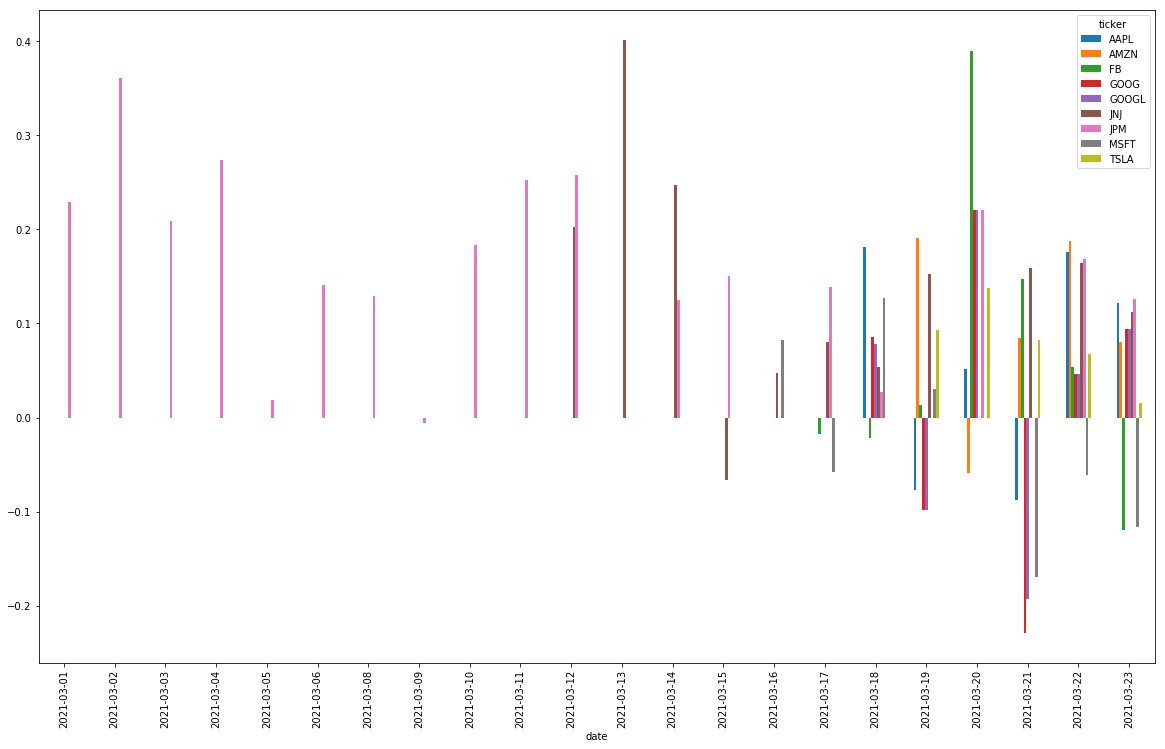

In [9]:
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar', figsize=(20, 12))
plt.show()

In [10]:
df['comp_class'] = [1 if x > 0 else 0 for x in df['compound']] 
df['comp_class']

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    1
897    0
898    1
899    1
Name: comp_class, Length: 900, dtype: int64

In [11]:
# Create the features set (X) and the target vector (y)
X = df['title'].values
y = df['comp_class'].values

In [13]:
# Create the train, test, and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [38]:
df.head(15)

,ticker,date,time,title,compound,comp_class
0,AAPL,2021-03-23,05:52PM,Intel Spending Billions to Revive Manufacturin...,0.3400,1
1,AAPL,2021-03-23,05:38PM,Former Goldman Sachs CFO Marty Chavez on how t...,0.3612,1
2,AAPL,2021-03-23,05:13PM,Adobe Projects Sales Topping Estimates on Crea...,0.6705,1
3,AAPL,2021-03-23,04:08PM,Best Dow Jones Stocks To Buy And Watch In Marc...,0.6369,1
4,AAPL,2021-03-23,12:52PM,"Iridex (IRIX) Beats on Q4 Earnings, Revenues I...",0.3182,1
5,AAPL,2021-03-23,10:55AM,Analyst Ratings for Apple,0.0000,0
6,AAPL,2021-03-23,10:49AM,Unusual Options Activity Insight: Apple,0.0000,0
7,AAPL,2021-03-23,09:30AM,COVID-19 market crash: reflecting one year later,-0.4019,0
8,AAPL,2021-03-23,09:30AM,Thinking About Buying Stock Or Options In Mode...,0.0000,0
9,AAPL,2021-03-23,09:20AM,6 Top-Ranked Stocks to Make the Most of 5G Upt...,0.0000,0


In [40]:
print(df.groupby(['ticker', 'date']).mean())

                   compound  comp_class
ticker date                            
AAPL   2021-03-18  0.181237    0.526316
       2021-03-19 -0.077489    0.111111
       2021-03-20  0.051392    0.333333
       2021-03-21 -0.087887    0.125000
       2021-03-22  0.175583    0.482759
...                     ...         ...
TSLA   2021-03-19  0.093214    0.428571
       2021-03-20  0.137625    0.416667
       2021-03-21  0.082837    0.500000
       2021-03-22  0.067600    0.363636
       2021-03-23  0.015317    0.166667

[73 rows x 2 columns]


In [ ]:
#Add in some code that analyzes the data from today and suggest if we should buy or sell ---- 

In [15]:
# Import the libraries for sentiment scoring using Vader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [17]:
# Define two lists to store vader sentiment scoring
y_vader_pred = []
y_vader_prob = []

In [18]:
# Score sentiment of test set using Vader
for comment in X_test:
    y_vader_prob.append(analyzer.polarity_scores(comment)["pos"])
    sentiment_score = analyzer.polarity_scores(comment)["compound"]
    if sentiment_score >= 0.1:
        y_vader_pred.append(1)
    else:
        y_vader_pred.append(0)

In [19]:
# Option 1: Normalizing data using MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(np.array(y_vader_prob).reshape(-1,1))
y_vader_prob_norm = scaler.transform(np.array(y_vader_prob).reshape(-1,1))
y_vader_prob_norm[:200]

array([[0.        ],
       [0.34504132],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.46694215],
       [0.43595041],
       [0.41322314],
       [0.24173554],
       [0.        ],
       [0.5392562 ],
       [0.55165289],
       [0.        ],
       [0.46694215],
       [0.        ],
       [0.        ],
       [0.5392562 ],
       [0.47727273],
       [0.16528926],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.3285124 ],
       [0.47727273],
       [0.45454545],
       [0.        ],
       [0.5392562 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.8677686 ],
       [0.        ],
       [0.        ],
       [0.61157025],
       [0.        ],
       [0.        ],
       [0.45247934],
       [0.        ],
       [0.42355372],
       [0.30578512],
       [0.5268595 ],
       [0.        ],
       [0.14256198],
       [0.        ],
       [0.   

In [20]:
# Option 2: Using a comprehension list
normalized = [(x - min(y_vader_prob)) / (max(y_vader_prob) - min(y_vader_prob))
              for x in y_vader_prob]
normalized[:5]

[0.0, 0.3450413223140496, 0.0, 0.0, 0.0]

In [21]:
# Import the Tokenizer method from Keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [22]:
# Create an instance of the Tokenizer and fit it with the X text data
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X)

In [23]:
# Print the first five elements of the encoded vocabulary
for token in list(tokenizer.word_index)[:5]:
    print(f"word: '{token}', token: {tokenizer.word_index[token]}")

word: 'to', token: 1
word: 'in', token: 2
word: 'the', token: 3
word: 'stocks', token: 4
word: 'on', token: 5


In [24]:
# Transform the text data to numerical sequences
X_seq = tokenizer.texts_to_sequences(X)

In [25]:
# Contrast a sample numerical sequence with its text version
print("**Text comment**")
print({X[0]})

**Text comment**
{'Intel Spending Billions to Revive Manufacturing, Chase TSMC'}


In [26]:
print("**Numerical sequence representation**")
print(X_seq[0])

**Numerical sequence representation**
[175, 778, 448, 1, 779, 583, 90, 780]


In [27]:
# Import the pad_sequences method from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
# Set the pad size
max_words = 140

# Pad the sequences using the pad_sequences() method
X_pad = pad_sequences(X_seq, maxlen=max_words, padding="post")

In [29]:
# Creating training, validation, and testing sets using the encoded data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_pad, y)

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

In [30]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [31]:
# Model set-up
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
embedding_size = 64

In [32]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2
model.add(LSTM(units=280))

# Output layer
model.add(Dense(units=1, activation="sigmoid"))

In [33]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [34]:
# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 64)           147072    
_________________________________________________________________
lstm (LSTM)                  (None, 280)               386400    
_________________________________________________________________
dense (Dense)                (None, 1)                 281       
Total params: 533,753
Trainable params: 533,753
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Training the model
batch_size = 1000
epochs = 10
model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.6930 - accuracy: 0.6482 - tp: 0.0000e+00 - tn: 328.0000 - fp: 0.0000e+00 - fn: 178.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.6824 - val_accuracy: 0.6213 - val_tp: 0.0000e+00 - val_tn: 105.0000 - val_fp: 0.0000e+00 - val_fn: 64.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6797 - accuracy: 0.6482 - tp: 0.0000e+00 - tn: 328.0000 - fp: 0.0000e+00 - fn: 178.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.6726 - val_accuracy: 0.6213 - val_tp: 0.0000e+00 - val_tn: 105.0000 - val_fp: 0.0000e+00 - val_fn: 64.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.6667 - accuracy: 0.6482 - tp: 0.0000e+00 - tn: 328.0000 - fp: 0.0000e+00 - fn: 178.0000 - precision: 0.0000e+

In [32]:
# Predict classes using the testing data
y_rnn_pred = model.predict_classes(X_test_rnn, batch_size=1000)

In [33]:
# Accuracy
from sklearn.metrics import accuracy_score



print("Vader Accuracy: %.2f" % (accuracy_score(y_test, y_vader_pred)))
print("RNN LSTM Accuracy %.2f" % (accuracy_score(y_test_rnn, y_rnn_pred)))

Vader Accuracy: 0.99
RNN LSTM Accuracy 0.60


In [34]:
# Import the confusion_matrix method from sklearn
from sklearn.metrics import confusion_matrix

In [35]:
# Confusion matrtix metrics from Vader
tn_vader, fp_vader, fn_vader, tp_vader = confusion_matrix(y_test, y_vader_pred).ravel()

# Dataframe to display confusion matrix from Vader
cm_vader_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_vader}", f"FP={fp_vader}"],
        "Negative(0)": [f"FN={fn_vader}", f"TN={tn_vader}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_vader_df.index.name = "Actual"
cm_vader_df.columns.name = "Predicted"
print("Confusion Matrix from Vader")
display(cm_vader_df)

Confusion Matrix from Vader


Predicted,Positive(1),Negative(0)
Actual,,
Positive(1),TP=78,FN=3
Negative(0),FP=0,TN=144


In [36]:
# Confusion matrtix metrics from the RNN LSTM model
tn_rnn, fp_rnn, fn_rnn, tp_rnn = confusion_matrix(y_test_rnn, y_rnn_pred).ravel()

# Dataframe to display confusion matrix from the RNN LSTM model
cm_rnn_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_rnn}", f"FP={fp_rnn}"],
        "Negative(0)": [f"FN={fn_rnn}", f"TN={tn_rnn}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_rnn_df.index.name = "Actual"
cm_rnn_df.columns.name = "Predicted"
print("Confusion Matrix from the RNN LSTM Model")
display(cm_rnn_df)

Confusion Matrix from the RNN LSTM Model


Predicted,Positive(1),Negative(0)
Actual,,
Positive(1),TP=0,FN=90
Negative(0),FP=0,TN=135


In [37]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

In [38]:
# Display classification report for Vader
print("Classification Report for Vader")
print(classification_report(y_vader_pred, y_test))

Classification Report for Vader
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       147
           1       0.96      1.00      0.98        78

    accuracy                           0.99       225
   macro avg       0.98      0.99      0.99       225
weighted avg       0.99      0.99      0.99       225



In [39]:
# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_rnn_pred, y_test_rnn))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       225
           1       0.00      0.00      0.00         0

    accuracy                           0.60       225
   macro avg       0.50      0.30      0.37       225
weighted avg       1.00      0.60      0.75       225



In [40]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [41]:
# Data for ROC Curve - VADER
fpr_test_vader, tpr_test_vader, thresholds_test_vader = roc_curve(y_test, y_vader_prob_norm)

In [42]:
# AUC for VADER
auc_test_vader = auc(fpr_test_vader, tpr_test_vader)
auc_test_vader = round(auc_test_vader, 4)

In [43]:
# Dataframe to plot ROC Curve for VADER
roc_df_test_vader = pd.DataFrame({"FPR Test": fpr_test_vader, "TPR Test": tpr_test_vader,})

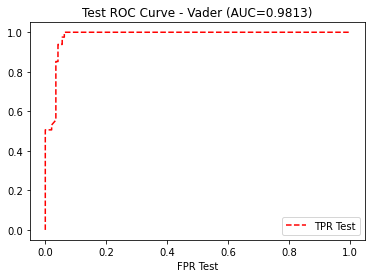

In [44]:
roc_df_test_vader.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve - Vader (AUC={auc_test_vader})",
)

In [45]:
# Making predictions to feed the roc_curve module
test_predictions_rnn = model.predict(X_test_rnn, batch_size=1000)

In [46]:
# Data for ROC Curve - RNN LSTM Model
fpr_test_rnn, tpr_test_rnn, thresholds_test_rnn = roc_curve(y_test_rnn, test_predictions_rnn)

In [47]:
# AUC for the RNN LSTM Model
auc_test_rnn = auc(fpr_test_rnn, tpr_test_rnn)
auc_test_rnn = round(auc_test_rnn, 4)

In [48]:
# Dataframe to plot ROC Curve for the RNN LSTM model
roc_df_test_rnn = pd.DataFrame({"FPR Test": fpr_test_rnn, "TPR Test": tpr_test_rnn,})

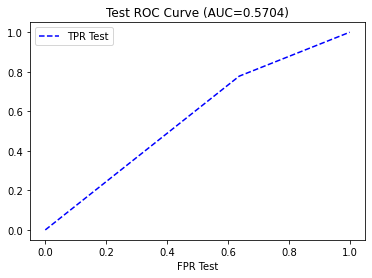

In [49]:
roc_df_test_rnn.plot(
    x="FPR Test",
    y="TPR Test",
    color="blue",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test_rnn})",
)